## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering
#### 4. State level cluster map

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.



In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path
path = r'C:\Users\muham\OneDrive\Desktop\careerfoundry\Data Immersion\Achievement 6\05-10-25 Accident_data_germany_2024_analysis'

In [6]:
# Import Data
df_gemeinde_level = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_gemeinde_level.csv'), low_memory= False)

In [7]:
df_gemeinde_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9507 entries, 0 to 9506
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          9507 non-null   int64  
 1   administrative_region          9507 non-null   int64  
 2   administrative_district        9507 non-null   int64  
 3   municipality                   9507 non-null   int64  
 4   accident_count                 9507 non-null   int64  
 5   MuncipalityName                9507 non-null   object 
 6   MuncipalityArea                9507 non-null   float64
 7   MuncipalityPopulation          9507 non-null   float64
 8   Fatal                          9507 non-null   int64  
 9   Minor                          9507 non-null   int64  
 10  Severe                         9507 non-null   int64  
 11  darkness                       9507 non-null   int64  
 12  daylight                       9507 non-null   i

In [6]:
df_gemeinde_level = df_gemeinde_level.dropna()


In [7]:
df_gemeinde_level.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9507 entries, 0 to 9507
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   state                    9507 non-null   int64  
 1   administrative_region    9507 non-null   int64  
 2   administrative_district  9507 non-null   int64  
 3   municipality             9507 non-null   int64  
 4   accident_count           9507 non-null   int64  
 5   MuncipalityName          9507 non-null   object 
 6   MuncipalityArea          9507 non-null   float64
 7   MuncipalityPopulation    9507 non-null   float64
 8   Fatal                    9507 non-null   int64  
 9   Minor                    9507 non-null   int64  
 10  Severe                   9507 non-null   int64  
 11  darkness                 9507 non-null   int64  
 12  daylight                 9507 non-null   int64  
 13  twilight                 9507 non-null   int64  
 14  Dry                      9507

In [8]:
# Import Data
df_merged_new = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_new.csv'), low_memory= False)

In [9]:
df_merged_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268519 entries, 0 to 268518
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     268519 non-null  int64  
 1   OID_                           268519 non-null  int64  
 2   accident_id                    268519 non-null  object 
 3   state                          268519 non-null  int64  
 4   administrative_region          268519 non-null  int64  
 5   administrative_district        268519 non-null  int64  
 6   municipality                   268519 non-null  int64  
 7   year_of_accident               268519 non-null  int64  
 8   month_of_accident              268519 non-null  int64  
 9   hour_of_accident               268519 non-null  int64  
 10  day_of_week                    268519 non-null  int64  
 11  accident_category              268519 non-null  int64  
 12  collision_type                

#### Preparing Data Set for Clustering

##### Along with light conditions and road surface conditions bringing in the accident behaviour variable to data frame before clustering.

In [10]:
muncipality_accident_behavior = (
    df_merged_new.groupby(
        ['state', 'administrative_region', 'administrative_district', 'municipality']
    )['accident_behaviour_label']
    .value_counts()
    .unstack(fill_value=0)
    .astype(int)   # <--- ensure integer counts
    .reset_index()
)

In [11]:
muncipality_accident_behavior

accident_behaviour_label,state,administrative_region,administrative_district,municipality,Driving Error,Other,Pedestrian/Road Crossing,Same-Direction Collision,Stationary Collision,Turn-Off Accident,Turn/Cross Collision
0,1,0,1,0,16,83,12,85,16,67,70
1,1,0,2,0,74,241,49,216,43,190,214
2,1,0,3,0,74,278,56,213,50,204,243
3,1,0,4,0,16,63,13,76,16,74,104
4,1,0,51,1,2,0,0,3,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...
9503,16,0,77,43,8,4,0,12,0,4,5
9504,16,0,77,44,0,2,0,0,0,0,0
9505,16,0,77,47,2,0,0,1,0,1,2
9506,16,0,77,48,1,0,0,1,0,0,0


In [12]:
# merging data frames to get muncipality level data
df_gemeinde_level = df_gemeinde_level.merge(
    muncipality_accident_behavior.drop_duplicates(),
    on=['state', 'administrative_region', 'administrative_district', 'municipality'],
    how='left'
)

In [13]:
df_gemeinde_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9507 entries, 0 to 9506
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state                     9507 non-null   int64  
 1   administrative_region     9507 non-null   int64  
 2   administrative_district   9507 non-null   int64  
 3   municipality              9507 non-null   int64  
 4   accident_count            9507 non-null   int64  
 5   MuncipalityName           9507 non-null   object 
 6   MuncipalityArea           9507 non-null   float64
 7   MuncipalityPopulation     9507 non-null   float64
 8   Fatal                     9507 non-null   int64  
 9   Minor                     9507 non-null   int64  
 10  Severe                    9507 non-null   int64  
 11  darkness                  9507 non-null   int64  
 12  daylight                  9507 non-null   int64  
 13  twilight                  9507 non-null   int64  
 14  Dry     

In [14]:
rate_columns = ['Driving Error','Other','Pedestrian/Road Crossing','Same-Direction Collision','Stationary Collision','Turn-Off Accident','Turn/Cross Collision','Minor','Severe','Slippery (winter)']
for column_name in df_gemeinde_level:
    if column_name in rate_columns:
        df_gemeinde_level[column_name + '_rate'] = df_gemeinde_level[column_name] / df_gemeinde_level['accident_count']
        print(f"Column:{column_name}")

Column:Minor
Column:Severe
Column:Slippery (winter)
Column:Driving Error
Column:Other
Column:Pedestrian/Road Crossing
Column:Same-Direction Collision
Column:Stationary Collision
Column:Turn-Off Accident
Column:Turn/Cross Collision


In [15]:
df_gemeinde_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9507 entries, 0 to 9506
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          9507 non-null   int64  
 1   administrative_region          9507 non-null   int64  
 2   administrative_district        9507 non-null   int64  
 3   municipality                   9507 non-null   int64  
 4   accident_count                 9507 non-null   int64  
 5   MuncipalityName                9507 non-null   object 
 6   MuncipalityArea                9507 non-null   float64
 7   MuncipalityPopulation          9507 non-null   float64
 8   Fatal                          9507 non-null   int64  
 9   Minor                          9507 non-null   int64  
 10  Severe                         9507 non-null   int64  
 11  darkness                       9507 non-null   int64  
 12  daylight                       9507 non-null   i

In [16]:
# Bringing state name to municipality level data set
df_gemeinde_level = df_gemeinde_level.merge(
    df_merged_new[['state', 'administrative_region', 'administrative_district', 'municipality', 'state_name']].drop_duplicates(),
    on=['state', 'administrative_region', 'administrative_district', 'municipality'],
    how='left'
)


In [17]:
df_gemeinde_level['state_name'].isna().sum()


np.int64(0)

In [19]:
# Exporting data frame
df_gemeinde_level.to_csv(
    os.path.join(path, '02 Data', 'Prepared Data', 'df_gemeinde_level.csv'),
    index=False
)

#### Creating a subset from original data frame to include only relevant and numerical variables.

In [8]:
cluster_vars = [
    'm_accident_per_100k', 'Fatal_rate',
    'darkness_rate','daylight_rate','twilight_rate',
    'Dry_rate','Wet/damp/slippery_rate','Slippery (winter)_rate',
    'Driving Error_rate','Pedestrian/Road Crossing_rate',
    'Same-Direction Collision_rate','Stationary Collision_rate',
    'Turn-Off Accident_rate','Turn/Cross Collision_rate','Other_rate'
]


In [9]:
df_clustering_1 = df_gemeinde_level[['state', 'municipality', 'state_name', 'MuncipalityName','administrative_region','administrative_district'] + cluster_vars].copy()


In [11]:
df_clustering_1.shape

(9507, 21)

In [15]:
# ensure all features are numeric
df_clustering_1[cluster_vars] = df_clustering_1[cluster_vars].apply(pd.to_numeric, errors='coerce')

In [16]:
# Normalizing data frame before clustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clustering_1[cluster_vars])

df_clustering_scaled = pd.DataFrame(
    X_scaled,
    index=df_clustering_1.index,
    columns=cluster_vars   
)


In [17]:
df_clustering_scaled

,m_accident_per_100k,Fatal_rate,darkness_rate,daylight_rate,twilight_rate,Dry_rate,Wet/damp/slippery_rate,Slippery (winter)_rate,Driving Error_rate,Pedestrian/Road Crossing_rate,Same-Direction Collision_rate,Stationary Collision_rate,Turn-Off Accident_rate,Turn/Cross Collision_rate,Other_rate
0,-0.037155,-0.153592,0.152090,-0.245934,0.209207,-0.476588,0.555657,-0.119996,-0.960209,0.202022,0.097994,0.318202,0.697721,0.124556,0.409139
1,0.075871,-0.177431,0.062833,-0.102597,0.088400,-0.250346,0.311637,-0.106867,-0.867174,0.401869,-0.050497,0.266348,0.650418,0.163806,0.393591
2,0.354933,-0.216394,-0.103449,0.061558,0.067211,-0.081943,0.149727,-0.140862,-0.887993,0.437522,-0.138982,0.303561,0.633211,0.208982,0.462482
3,0.196500,-0.228009,-0.041171,-0.103401,0.280213,-0.238030,0.355643,-0.233263,-0.966053,0.224929,-0.052180,0.296729,0.782139,0.560891,0.095117
4,-0.280545,-0.228009,-0.427553,0.624150,-0.454920,-0.554527,0.290942,0.649319,-0.413011,-0.313557,0.350220,-0.279740,0.752152,0.624828,-0.761614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9502,-0.340834,0.165502,-0.043528,0.138463,-0.194785,0.719325,-0.615957,-0.313014,-0.262419,-0.313557,0.634570,-0.279740,0.217615,-0.122282,-0.164911
9503,-0.662070,-0.228009,1.449899,-3.274471,3.837308,1.093987,-1.010261,-0.313014,-1.122944,-0.313557,-0.990290,-0.279740,-0.604749,-0.884639,4.161192
9504,2.064910,-0.228009,-0.114644,-0.386603,0.975822,-0.279774,-0.287370,1.290875,0.060278,-0.313557,-0.245562,-0.279740,0.526002,0.792547,-0.761614
9505,-0.505066,-0.228009,1.449899,-1.108570,-0.454920,-0.966655,1.158411,-0.313014,0.651889,-0.313557,1.243893,-0.279740,-0.604749,-0.884639,-0.761614


### 2. The elbow technique

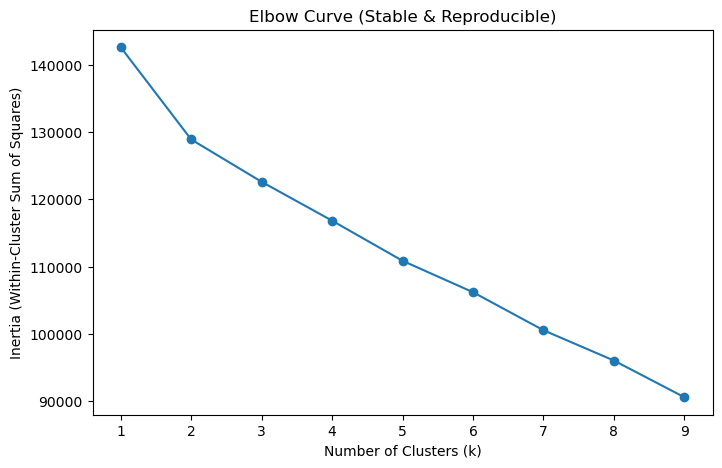

In [18]:
scores = []
num_cl = range(1, 10)

for k in num_cl:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df_clustering_scaled)
    scores.append(km.inertia_)  # inertia_ is the *positive* within-cluster sum of squares

plt.figure(figsize=(8,5))
plt.plot(num_cl, scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Curve (Stable & Reproducible)")
plt.show()


In [19]:
from sklearn.metrics import silhouette_score
sil_scores = {}

for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(df_clustering_scaled)
    score = silhouette_score(df_clustering_scaled, labels)
    sil_scores[k] = score
    print(f"k={k}, silhouette={score:.3f}")


k=2, silhouette=0.262
k=3, silhouette=0.176
k=4, silhouette=0.094
k=5, silhouette=0.142
k=6, silhouette=0.098
k=7, silhouette=0.133
k=8, silhouette=0.150
k=9, silhouette=0.133


Here we can see that, k=2 achieved the highest silhouette value, but this will produce only a broad urban–rural split, which is too general to support targeted safety planning.
k=4 is selected because it provides the best balance between model quality and interpretability, revealing four distinct accident environment profiles that align with real-world traffic behavior and infrastructure conditions.

### k-means clustering

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

df_clustering_1 = df_clustering_1.copy()
df_clustering_1['cluster'] = kmeans.fit_predict(df_clustering_scaled)


In [22]:
df_clustering_1.head()

,state,municipality,state_name,MuncipalityName,administrative_region,administrative_district,m_accident_per_100k,Fatal_rate,darkness_rate,daylight_rate,...,Wet/damp/slippery_rate,Slippery (winter)_rate,Driving Error_rate,Pedestrian/Road Crossing_rate,Same-Direction Collision_rate,Stationary Collision_rate,Turn-Off Accident_rate,Turn/Cross Collision_rate,Other_rate,cluster
0,1,0,Schleswig-Holstein,"Flensburg, Stadt",0,1,362.311318,0.005731,0.223496,0.699140,...,0.361032,0.020057,0.045845,0.034384,0.243553,0.045845,0.191977,0.200573,0.237822,2
1,1,0,Schleswig-Holstein,"Kiel, Landeshauptstadt",0,2,406.462235,0.003895,0.204479,0.732230,...,0.304771,0.021422,0.072055,0.047712,0.210321,0.041870,0.185005,0.208374,0.234664,2
2,1,0,Schleswig-Holstein,"Lübeck, Hansestadt",0,3,515.471047,0.000894,0.169052,0.770125,...,0.267442,0.017889,0.066190,0.050089,0.190519,0.044723,0.182469,0.217352,0.248658,2
3,1,0,Schleswig-Holstein,"Neumünster, Stadt",0,4,453.582929,0.000000,0.182320,0.732044,...,0.314917,0.008287,0.044199,0.035912,0.209945,0.044199,0.204420,0.287293,0.174033,2
4,1,1,Schleswig-Holstein,Albersdorf,0,51,267.236772,0.000000,0.100000,0.900000,...,0.300000,0.100000,0.200000,0.000000,0.300000,0.000000,0.200000,0.300000,0.000000,2


#### Cluster Profile Table

In [23]:
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=cluster_vars
)


In [24]:
cluster_centers

,m_accident_per_100k,Fatal_rate,darkness_rate,daylight_rate,twilight_rate,Dry_rate,Wet/damp/slippery_rate,Slippery (winter)_rate,Driving Error_rate,Pedestrian/Road Crossing_rate,Same-Direction Collision_rate,Stationary Collision_rate,Turn-Off Accident_rate,Turn/Cross Collision_rate,Other_rate
0,429.778437,0.017895,0.377687,0.569275,0.053038,0.339768,0.123032,0.537200,0.595195,0.006765,0.138040,0.007705,0.037558,0.097018,0.117719
1,403.953928,0.016386,0.336434,0.593518,0.070048,0.249229,0.735207,0.015564,0.502375,0.006466,0.176327,0.019542,0.040163,0.105578,0.149548
2,351.781910,0.014252,0.246366,0.679243,0.074392,0.752885,0.224921,0.022194,0.247373,0.033357,0.222906,0.025362,0.127832,0.190558,0.152612
3,401.615242,0.022685,0.055161,0.927889,0.016949,0.875799,0.109464,0.014738,0.342948,0.007956,0.238917,0.017316,0.050587,0.180269,0.162006


In [33]:
# Exporting data frame
df_clustering_1.to_csv(
    os.path.join(path, '02 Data', 'Prepared Data', 'df_clustering_1_new.csv'),
    index=False
)

In [25]:
df_clustering_1['cluster'].value_counts()

cluster
2    4922
3    3370
1     963
0     252
Name: count, dtype: int64

In [26]:
df_clustering_1

,state,municipality,state_name,MuncipalityName,administrative_region,administrative_district,m_accident_per_100k,Fatal_rate,darkness_rate,daylight_rate,...,Wet/damp/slippery_rate,Slippery (winter)_rate,Driving Error_rate,Pedestrian/Road Crossing_rate,Same-Direction Collision_rate,Stationary Collision_rate,Turn-Off Accident_rate,Turn/Cross Collision_rate,Other_rate,cluster
0,1,0,Schleswig-Holstein,"Flensburg, Stadt",0,1,362.311318,0.005731,0.223496,0.699140,...,0.361032,0.020057,0.045845,0.034384,0.243553,0.045845,0.191977,0.200573,0.237822,2
1,1,0,Schleswig-Holstein,"Kiel, Landeshauptstadt",0,2,406.462235,0.003895,0.204479,0.732230,...,0.304771,0.021422,0.072055,0.047712,0.210321,0.041870,0.185005,0.208374,0.234664,2
2,1,0,Schleswig-Holstein,"Lübeck, Hansestadt",0,3,515.471047,0.000894,0.169052,0.770125,...,0.267442,0.017889,0.066190,0.050089,0.190519,0.044723,0.182469,0.217352,0.248658,2
3,1,0,Schleswig-Holstein,"Neumünster, Stadt",0,4,453.582929,0.000000,0.182320,0.732044,...,0.314917,0.008287,0.044199,0.035912,0.209945,0.044199,0.204420,0.287293,0.174033,2
4,1,1,Schleswig-Holstein,Albersdorf,0,51,267.236772,0.000000,0.100000,0.900000,...,0.300000,0.100000,0.200000,0.000000,0.300000,0.000000,0.200000,0.300000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9502,16,43,Thüringen,"Schmölln, Stadt",0,77,243.686309,0.030303,0.181818,0.787879,...,0.090909,0.000000,0.242424,0.000000,0.363636,0.000000,0.121212,0.151515,0.121212,3
9503,16,44,Thüringen,Starkenberg,0,77,118.203310,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2
9504,16,47,Thüringen,Thonhausen,0,77,1183.431953,0.000000,0.166667,0.666667,...,0.166667,0.166667,0.333333,0.000000,0.166667,0.000000,0.166667,0.333333,0.000000,2
9505,16,48,Thüringen,Treben,0,77,179.533214,0.000000,0.500000,0.500000,...,0.500000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,1


##### K-means clustering was performed on standardized data to ensure that all variables contributed equally to the distance calculations. However, the cluster centers returned by the model are in standardized units (z-scores), which are not directly interpretable.Therefore, the cluster centers were transformed back into the original scale of measurement using inverse_transform, and a profile table was created to interpret the characteristic accident patterns in each cluster.

### Visualizations

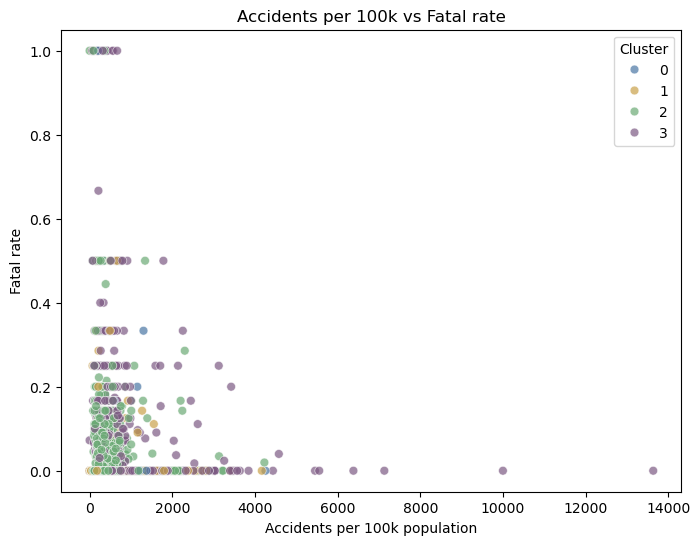

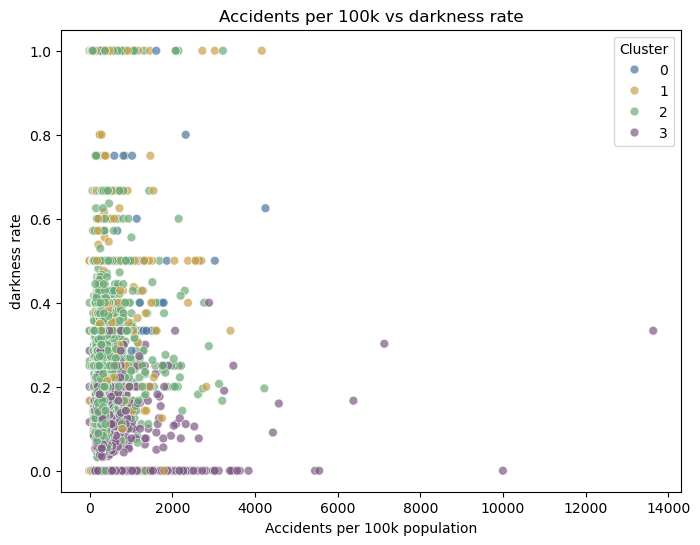

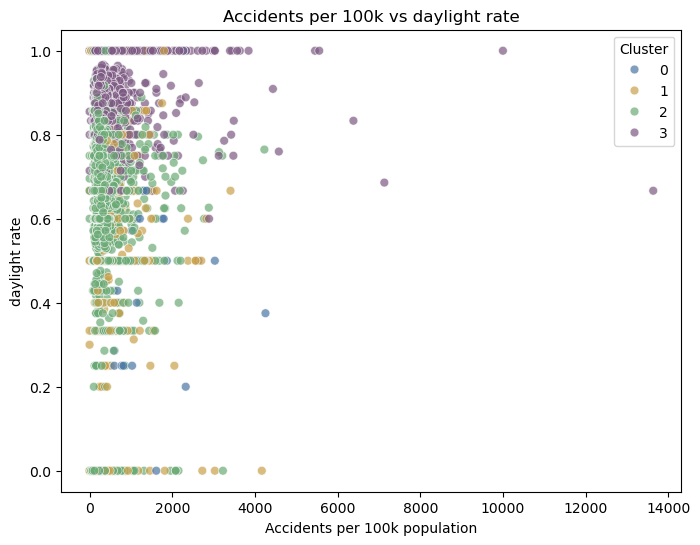

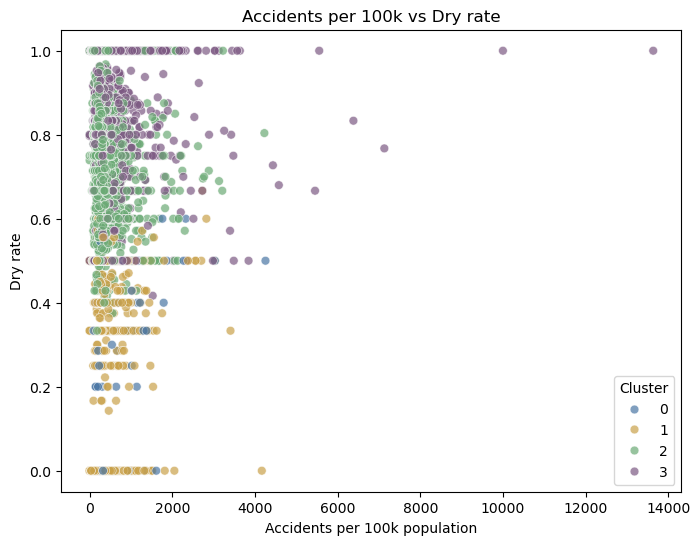

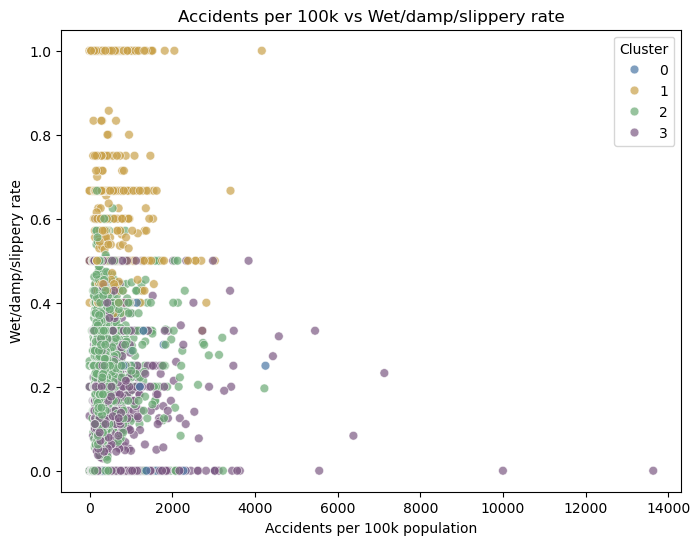

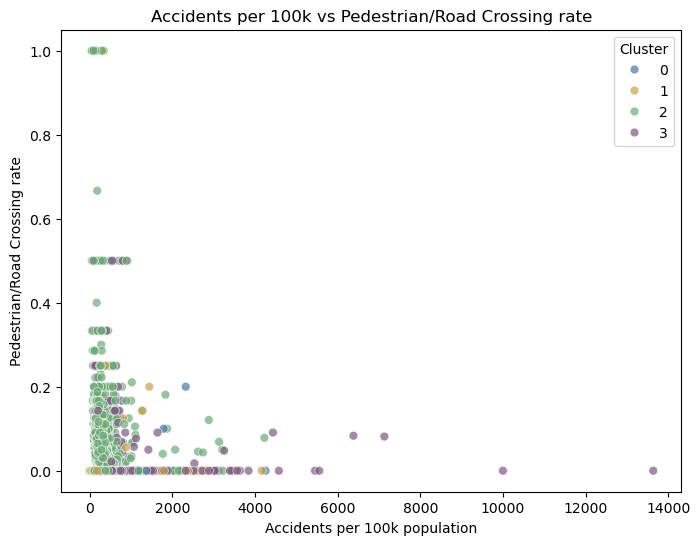

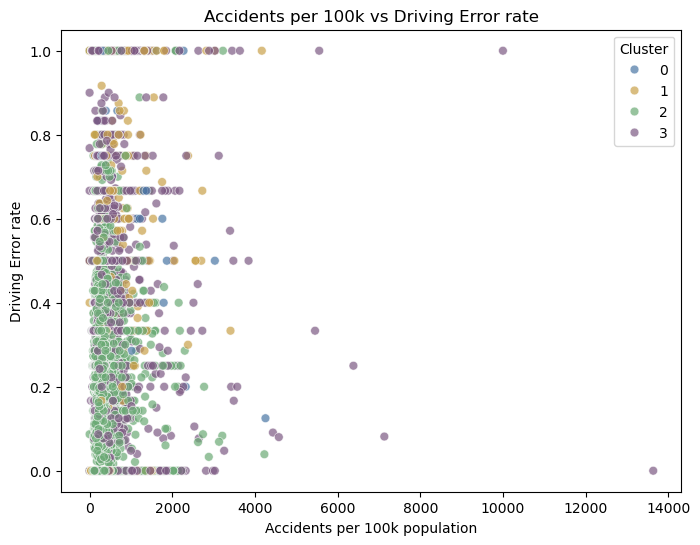

In [28]:

variables_to_compare = [
    'Fatal_rate',
    'darkness_rate',
    'daylight_rate',
    'Dry_rate',
    'Wet/damp/slippery_rate',
    'Pedestrian/Road Crossing_rate',
    'Driving Error_rate'
]

for var in variables_to_compare:
    plt.figure(figsize=(8,6))
    sns.scatterplot(
        x=df_clustering_1['m_accident_per_100k'],
        y=df_clustering_1[var],
        hue=df_clustering_1['cluster'],
        palette = ['#4b77a5', '#c9a14a', '#6baa75', '#7d5a83'],
        s=40,
        alpha=0.7
    )
    plt.xlabel('Accidents per 100k population')
    plt.ylabel(var.replace('_', ' '))
    plt.title(f'Accidents per 100k vs {var.replace("_"," ")}')
    plt.legend(title='Cluster', loc='best')
    plt.show()


##### Cluster statistics

In [29]:
# Mapping codes for better understanding 
cluster_color = {
    0: "Blue",
    1: "Gold",
    2: "Green",
    3: "Purple"
}


df_clustering_1['cluster_color'] = df_clustering_1['cluster'].map(cluster_color)

In [30]:
df_clustering_1.groupby('cluster_color').agg({'m_accident_per_100k':['mean', 'median'], 
                         'Driving Error_rate':['mean', 'median'],
                          'Same-Direction Collision_rate':['mean','median'],
                          'Turn/Cross Collision_rate':['mean','median'], 
                         'daylight_rate':['mean', 'median'],
                         'darkness_rate':['mean', 'median'],
                         'Dry_rate':['mean', 'median'],
                         'Wet/damp/slippery_rate':['mean', 'median'],
                         'Fatal_rate':['mean', 'median']})

m_accident_per_100k             Driving Error_rate            \
                             mean      median               mean    median   
cluster_color                                                                
Blue                   429.778437  281.498738           0.595195  0.500000   
Gold                   403.953928  277.777778           0.502375  0.500000   
Green                  351.854429  300.571765           0.247548  0.222222   
Purple                 401.583263  288.184438           0.342835  0.307692   

              Same-Direction Collision_rate            \
                                       mean    median   
cluster_color                                           
Blue                               0.138040  0.000000   
Gold                               0.176327  0.000000   
Green                              0.222874  0.209302   
Purple                             0.238987  0.187500   

              Turn/Cross Collision_rate           daylight_rate            \
                                   mean    median          mean    median   
cluster_color                                                               
Blue                           0.097018  0.000000      0.569275  0.585714   
Gold                           0.105578  0.000000      0.593518  0.666667   
Green                          0.190558  0.193548      0.679346  0.723195   
Purple                         0.180254  0.101282      0.928107  1.000000   

              darkness_rate            Dry_rate            \
                       mean    median      mean    median   
cluster_color                                               
Blue               0.377687  0.333333  0.339768  0.400000   
Gold               0.336434  0.333333  0.249229  0.333333   
Green              0.246279  0.210526  0.752877  0.750000   
Purple             0.055005  0.000000  0.875992  0.911765   

              Wet/damp/slippery_rate           Fatal_rate         
                                mean    median       mean median  
cluster_color                                                     
Blue                        0.123032  0.000000   0.017895    0.0  
Gold                        0.735207  0.666667   0.016386    0.0  
Green                       0.224867  0.235294   0.014263    0.0  
Purple                      0.109371  0.000000   0.022681    0.0

### Cluster Interpretation Summary

- **Cluster 0 (Blue) Driver-Error High-Exposure (Mixed light/surface) (n = 252)**

  - Highest accident frequency (dense traffic, frequent interactions)

  - High driver error involvement

  - Moderately high severity due to lower travel speeds
 
  - Mixed light and not surface driven

Frequent crashes under mixed conditions. Driver error and same-direction traffic conflicts are common, but severity remains moderate..

- **Cluster 2 (Green) Daylight & Dry Low-Risk Commuter Areas (n = 4,922)**

  - Lowest accident frequency overall

  - Most accidents occur in daylight and on dry roads (routine commuter travel)

  - Moderate driver error share
 
  - Lowest fatality severity

Crashes occur mostly in routine, predictable travel conditions, with lower levels of behavior-related errors and lower severity.

- **Cluster 1 (Gold) Wet-Surface Crash-Sensitive (n = 963)**
  
   - High share of wet/slippery road crashes (dominant condition)

   - Moderate accident frequency and moderate severity

   - Driver error is present, but friction loss and traction conditions influence crashes more than traffic complexity

   - Light conditions are mixed, not specifically day-only or night-only

Crashes increase on wet or slippery roads. Loss-of-control behaviors appear more often during reduced friction conditions.


- **Cluster 3 (Purple) High-Speed/High-Severity Areas (n = 3,370)**

   - Crashes occur almost entirely in daylight and dry conditions

   - Not driven by weather or low visibility

   - Driving error is moderate, but when crashes occur they are more severe

   - Likely rural / intercity road networks with higher travel speeds

Crashes in these municipalities occur mainly in daylight on dry roads, but are more severe—indicating higher travel speeds and more serious collision forces.

Given these results, next steps for an analytical pipeline would focus on statistically comparing the clusters, identifying external factors that explain their differences, evaluating spatial patterns, and developing predictive models to classify new municipalities based on their accident characteristics.

Note: used chatgpt for code modifications and visualization.

In [31]:
df_clustering_1['AGS'] = (
    df_clustering_1['state'].astype(str).str.zfill(2) +
    df_clustering_1['administrative_region'].astype(str).str.zfill(1) +
    df_clustering_1['administrative_district'].astype(str).str.zfill(2) +
    df_clustering_1['municipality'].astype(str).str.zfill(3)
)


In [32]:
df_clustering_1['AGS'].str.len().value_counts()


AGS
8    9507
Name: count, dtype: int64

In [33]:
# creating label column
cluster_mapping = {
    'Blue':   "Driver-Error High-Exposure (Mixed light/surface",
    'Green':  "Daylight & Dry Low-Risk Commuter Areas",
    'Gold': "Wet-Surface Crash-Sensitive",
    'Purple': "High-Speed/High-Severity Areas"
}

df_clustering_1['cluster_label'] = df_clustering_1['cluster_color'].map(cluster_mapping)

In [34]:
color_map = {
    "Driver-Error High-Exposure (Mixed light/surface": "Blue",
    "Daylight & Dry Low-Risk Commuter Areas": "Green",
    "Wet-Surface Crash-Sensitive": "Gold",
    "High-Speed/High-Severity Areas": "Purple"
}

df_clustering_1['cluster_color_final'] = df_clustering_1['cluster_label'].map(color_map)




In [35]:
df_clustering_1['state_name'] = df_clustering_1['state_name'].replace({
    'Baden-Württemberg': 'Baden-Wuerttemberg',
    'Thüringen': 'Thueringen'
})


In [43]:
df_clustering_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9507 entries, 0 to 9506
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state_name                     9507 non-null   object 
 1   MuncipalityName                9507 non-null   object 
 2   state                          9507 non-null   int64  
 3   administrative_region          9507 non-null   int64  
 4   administrative_district        9507 non-null   int64  
 5   municipality                   9507 non-null   int64  
 6   m_accident_per_100k            9507 non-null   float64
 7   Fatal_rate                     9507 non-null   float64
 8   darkness_rate                  9507 non-null   float64
 9   daylight_rate                  9507 non-null   float64
 10  twilight_rate                  9507 non-null   float64
 11  Dry_rate                       9507 non-null   float64
 12  Wet/damp/slippery_rate         9507 non-null   f

In [36]:
# Exporting data frame
df_clustering_1.to_csv(
    os.path.join(path, '02 Data', 'Prepared Data', 'df_clustering_1_AGS.csv'),
    index=False
)

In [37]:
state_cluster_share_new = (
    df_clustering_1.groupby(['state_name', 'cluster_label'])
    .size()
    .groupby(level=0, group_keys=False)
    .apply(lambda x: x / x.sum())
    .reset_index(name='share')
)


In [38]:
# Exporting data frame
state_cluster_share_new.to_csv(
    os.path.join(path, '02 Data', 'Prepared Data', 'state_cluster_share.csv'),
    index=False
)